In [1]:
using LatBo

mmHg = 133.3223684211
Npoints = 30, 30
δt, δx = 5e-4, 1e-3
μ₀ = 0.01sqrt(1./3.) * δt / δx
sim = lbgk(:D2Q9, Npoints, δt, δx; viscosity=4e-1, p₀=80.0 * mmHg, μ₀ = ones(2)μ₀)
Playground.initialize(sim.playground) do i, j
    coords = Float64[i, j]
    if j == 1 || j == Npoints[2] || i == 1 || i == Npoints[1]
        return Playground.SOLID
    else
        return Playground.FLUID
    end
end
sim.kernels[Playground.FLUID]

FluidKernel(SingleRelaxationTime{Float64}(0.625),[0x04=>NashZeroOrderPressure{Float64}([0.0,1.0],8.999342105266),0x02=>FluidStreaming(),0x03=>HalfWayBounceBack(),0x05=>NashZeroOrderPressure{Float64}([0.0,1.0],8.999342105266)])

In [2]:
run!(sim, nsteps=2max(Npoints...))

In [3]:
@time run!(sim, nsteps=50, doinit=false)

elapsed time: 9.143869207 seconds (6450709128 bytes allocated, 41.27% gc time)


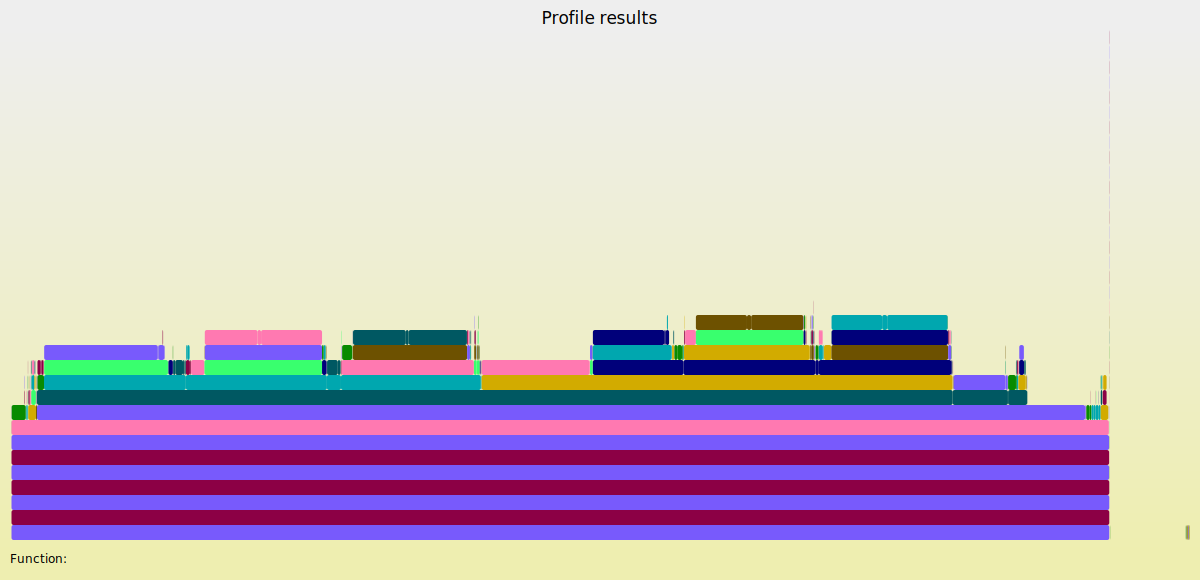

In [4]:
using ProfileView
Profile.clear()
@profile run!(sim, doinit=false, nsteps=50)
ProfileView.view()

In [2]:
cached = deepcopy(sim)
cached.indexing = LatBo.Indices.Cached(cached.indexing, cached.lattice)
nothing

In [3]:
run!(cached, nsteps=2max(Npoints...))

In [ ]:
@time run!(cached, nsteps=5000, doinit=false)

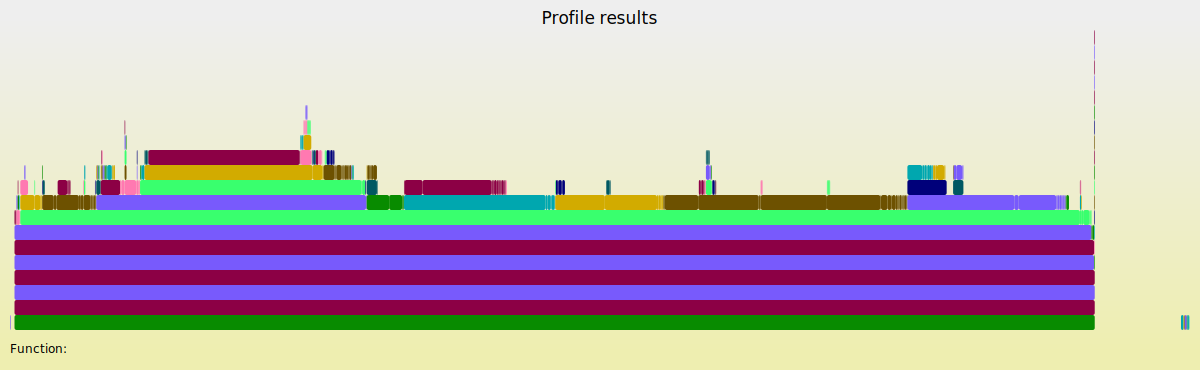

In [5]:
using ProfileView
Profile.clear()
@profile run!(cached, doinit=false, nsteps=500)
ProfileView.view()